# Practical example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


##  Data Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:
df = raw_data.drop('Model', axis=1)

In [5]:
df.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [6]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
# #of na rows is less than 5% of total rows. It's ok to remove less than 5% of data.
df_no_na = df.dropna(axis=0)

### Exploring the PDFs

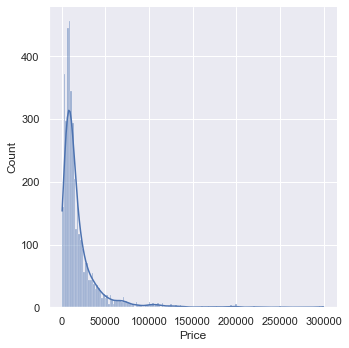

In [8]:
# Form the probability distribution function, it easy to spot anomalies, such as outliers.
# mean price = 19418.746935 median = 11500.000000 max= 300000, the shap is skew to thr right.
# Removing the top 1 % of data (outliers) would be more reasonable for the model we are goint ot bulid.
sns.displot(df_no_na.Price, kde=True)

### Dealing with outliers

In [9]:
# keeping the data only less than 99% percentile, the shape of pdf looks more reasonable than before.
q = df_no_na['Price'].quantile(.99)
df_1 = df_no_na[df_no_na['Price']<q]
df_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


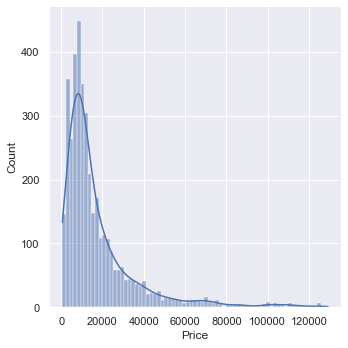

In [10]:
sns.displot(df_1.Price, kde =True)

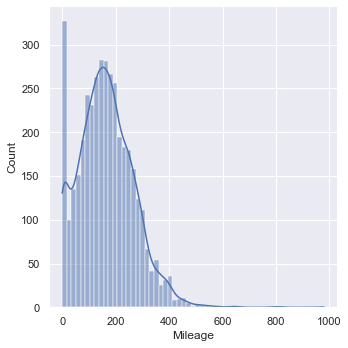

In [11]:
sns.displot(df_1.Mileage, kde =True)

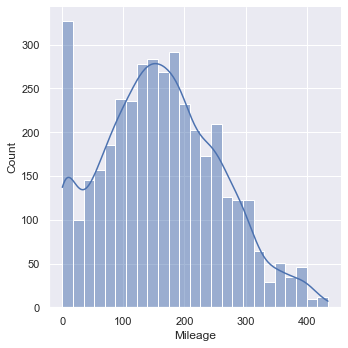

In [12]:
#same method appled to Mileage column
q = df_1['Mileage'].quantile(.99)
df_2 = df_1[df_1['Mileage']<q]
sns.displot(df_2.Mileage, kde=True)

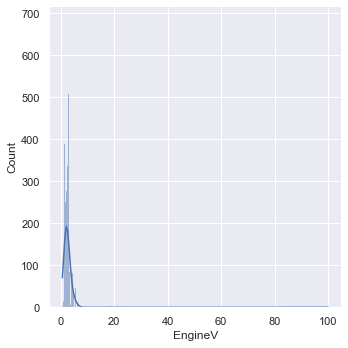

In [13]:
sns.displot(df_2['EngineV'], kde=True)

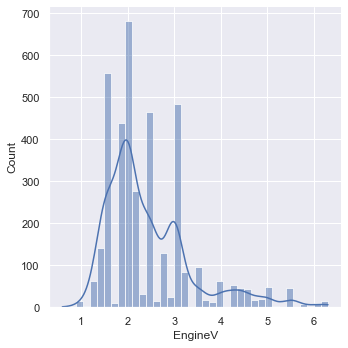

In [14]:
# The engine volume is very strange. Usually the engine volumns belows below 6.5l.
# Therefore, we remove the outlier that more than 6.5

df_3 = df_2[df_2['EngineV']<6.5]
sns.displot(df_3.EngineV, kde=True)

    The graph of engineV looks better.
    Next, we will look at year columns.

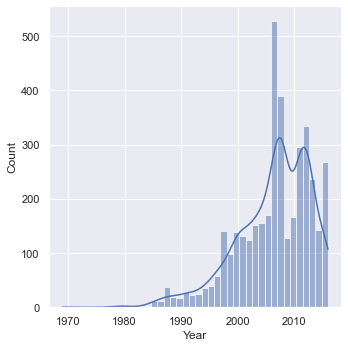

In [15]:
sns.displot(df_3.Year, kde=True)

    The pdf of Year is skew to the left.
    We remove 1% of data on the left side.
 

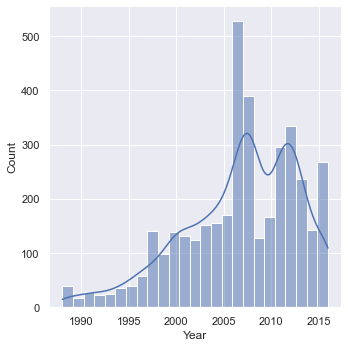

In [16]:
q = df_3['Year'].quantile(0.01)
df_4 = df_3[df_3['Year']>q]
sns.displot(df_4.Year, kde=True)

In [17]:
# Here's the new result
df_cleaned =  df_3.reset_index()

In [18]:
df_cleaned.describe(include='all')

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921.000000,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,NaN,7,NaN,6,NaN,NaN,4,2,NaN
top,NaN,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,NaN,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,2173.364193,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,1257.091218,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,0.000000,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,1080.000000,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,2173.000000,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,3269.000000,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS assumptions

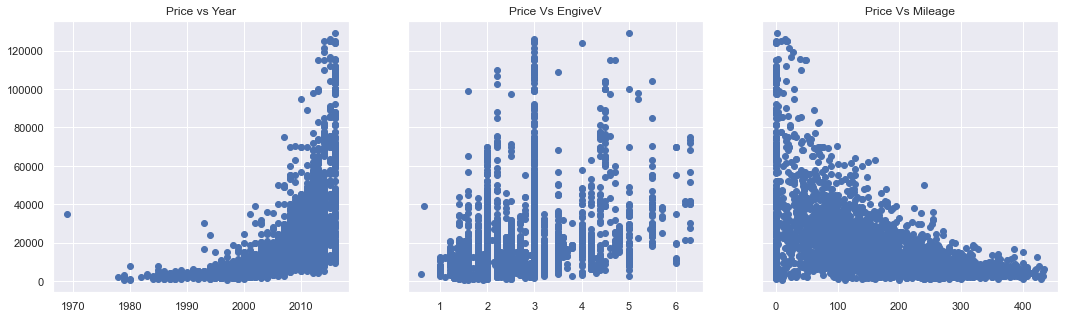

In [19]:
# Ploting scatter plot of price vs features side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (18,5))

ax1.scatter(df_cleaned.Year, df_cleaned.Price)
ax1.set_title('Price vs Year')

ax2.scatter(df_cleaned.EngineV, df_cleaned.Price)
ax2.set_title('Price Vs EngiveV')

ax3.scatter(df_cleaned.Mileage, df_cleaned.Price)
ax3.set_title('Price Vs Mileage')

plt.show()

In [ ]:
# Upon examining the subplots and the probability density function (PDF) of price, it becomes evident that 'Price' follows an exponential distribution. 
# In such instances, a suitable transformation is a logarithmic transformation."

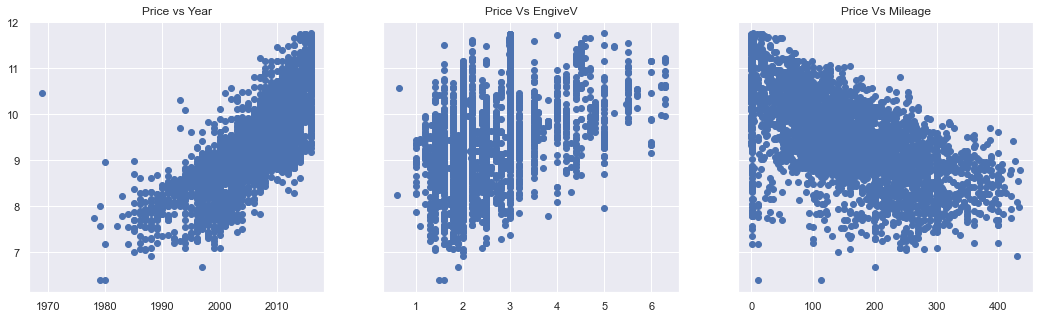

In [21]:
# Assumption 1 , checking for linearity throguh scatter plots

df_cleaned['log_price'] = np.log(df_cleaned.Price)

f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (18,5))

ax1.scatter(df_cleaned.Year, df_cleaned.log_price)
ax1.set_title('Price vs Year')

ax2.scatter(df_cleaned.EngineV, df_cleaned.log_price)
ax2.set_title('Price Vs EngiveV')

ax3.scatter(df_cleaned.Mileage, df_cleaned.log_price)
ax3.set_title('Price Vs Mileage')

plt.show()




    The relationships exhibit a distinct linear pattern, making them excellent material for linear regression analysis.
    Alternatively, we could have applied transformations to each of the independent variables.
    
    Given that we will be utilizing the logarithmically transformed price variable, we can safely omit the original 'Price' variable.

In [24]:
df_cleaned = df_cleaned.drop(["Price",'index'], axis =1)

In [25]:
df_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3916,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3917,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3918,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557
3919,BMW,sedan,194,2.0,Petrol,yes,1985,8.987197


### Multicollinearity (LInear Reg assumption )
    a statistical concept where several independent variables in a model are correlated. 
    (Seasons and tempture two variable are correlated) Usually check by VIFs, variance inflation factors.
    
    Note: Autocorrealtion usually occur in time series data.  
          No endogeneity. residuel and variables x are not correlated.
          *Normality and homoscedasticity.(Normal,  zero mean, equal variance)
          *Linearity
    * means critical assumption

In [46]:
# We want ot check all numerical features for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()

# i means coulumns of variables of DataFrame which used by the function variance_inflations_factor.
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

KeyError: "['Year'] not in index"

In [34]:
vif

,VIF,Features
0,3.791073,Mileage
1,10.397185,Year
2,7.671170,EngineV


VIf table check
VIF =1 no multicollinerarity  
1<vif<5  perfectly ok  
5<VIF or 6 or 10 depend your standard. there is 10    unacceptable 

here drop the year column

In [43]:
df_cleaned  = df_cleaned.drop('Year', axis =1)

In [47]:
df_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


### Creat dummy vairables

In [48]:
df_with_dummies = pd.get_dummies(df_cleaned, drop_first=True)
df_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange columns

In [49]:
df_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [51]:
df_preproccessed =  df_with_dummies[['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]

### Check VIFs of all features in df_with_dummies dataframe including dummies

In [54]:
Vifs_pre = pd.DataFrame()
Vifs_pre['VIF'] = [variance_inflation_factor(df_preproccessed,i) for i in range(df_preproccessed.shape[1])]
Vifs_pre['Features'] = df_preproccessed.columns.values
Vifs_pre

,VIF,Features
0,41.712318,log_price
1,4.441987,Mileage
2,13.468230,EngineV
3,2.587058,Brand_BMW
4,3.075287,Brand_Mercedes-Benz
5,1.819335,Brand_Mitsubishi
6,2.268657,Brand_Renault
7,2.393908,Brand_Toyota
8,3.303901,Brand_Volkswagen
9,1.611588,Body_hatch


In [57]:
# For the table above, the VIF of feature 'log_price' has high VIFs.
# Since We want to use the featurs to determine target variable 'price'.
# To fix this issue, we could drop the 'log_price' column and check vifs again.
# The multicollinearity assumption refers only to the idea that the **independent variables** shoud not be collinear.
variables = df_preproccessed.drop('log_price', axis = 1)
Vifs_pre = pd.DataFrame()
Vifs_pre['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
Vifs_pre['Features'] = variables.columns.values
Vifs_pre

,VIF,Features
0,4.440732,Mileage
1,7.816635,EngineV
2,2.283607,Brand_BMW
3,2.868268,Brand_Mercedes-Benz
4,1.633050,Brand_Mitsubishi
5,2.079414,Brand_Renault
6,2.153940,Brand_Toyota
7,2.846102,Brand_Volkswagen
8,1.495319,Body_hatch
9,1.537979,Body_other


    As evident, there are two variables with high VIF (Variance Inflation Factor). The majority of the VIF scores align with our expectations. （fit the rule 1<vif<5 perfectly ok)

In [59]:
variables.Registration_yes.value_counts()

1    3559
0     362
Name: Registration_yes, dtype: int64

    In the case of registration, a primary concern arises from the fact that the majority of values are 'yes,' leading to various issues. One notable consequence is the presence of multicollinearity. Considering that all independent variables perform well in predicting 'log_price,' the constant 'yes' value for 'registration' means that predicting 'log_price' also implies predicting 'yes' for registration. This imbalance raises concerns, and in situations where a single category is overwhelmingly predominant, it might be prudent to consider dropping the variable.

In [62]:
# Solution for this
df_with_dummies_test = pd.get_dummies(df_cleaned) #, drop_first=True)
data_with_dummies_test.head()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [64]:
variables = data_with_dummies_test.drop('log_price', axis=1)
# We will take a look of how all dummies impacted the vif without dropping.

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

D:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.260841,Mileage
1,1.572940,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


        As you see, we are getting a warnning result. Most of VIf are equal to infinity.
        
        "The primary reason, as previously discussed, is that when a car is categorized as 'Audi,' all other brand dummies automatically become 0. However, when a car is not 'Audi,' at least one of the other dummies will be 1. This creates a situation of perfect multicollinearity. Including all these dummies in a regression would result in inflated coefficients and inaccurate estimates. 
        Hence, the necessity of dropping one of the dummy variables for each feature becomes necessary.

## Linear regression model

### Declare the inputs and the targets

In [73]:
target = df_preproccessed['log_price']
inputs = df_preproccessed.drop('log_price', axis=1)

### Scale the data

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [75]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

### Create the regression

In [78]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [80]:

y_hat = reg.predict(x_train)

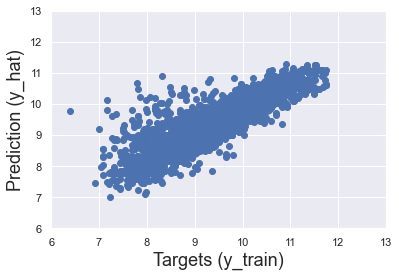

In [82]:
# The most straightforward method to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot. 
# The closer the points align with the 45-degree line, the better the prediction."
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Prediction (y_hat)', size = 18)

# Change the scale of x axis and y axis
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### residual plot

Text(0.5, 1.0, 'residuals PDF')

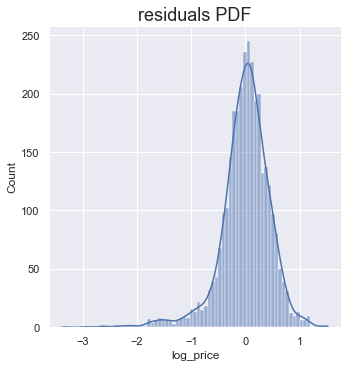

In [84]:
# Another valuable method to assess our model is through a residual plot.
# We can visualize the probability density function (PDF) of the residuals and inspect for any anomalies."

sns.displot(y_train - y_hat, kde = True)
plt.title("residuals PDF", size = 18)

In [90]:
# In an ideal scenario, this plot should exhibit a normal distribution. 
# However, in our case, we observe numerous negative residuals, indicating a significant deviation from the mean. 
# Considering the definition of the residuals (y_train - y_hat), 
# negative values suggest that y_hat (predictions) are considerably higher than y_train (the targets)."

reg.score(x_train, y_train)

0.7262985119939247

### Finding the weight and intercept

In [91]:
# the bias (intercept) of the regression
reg.intercept_

9.3945175650554

In [87]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['weight'] = reg.coef_
reg_summary

,Features,weight
0,Mileage,-0.458506
1,EngineV,0.221184
2,Brand_BMW,0.023857
3,Brand_Mercedes-Benz,0.014820
4,Brand_Mitsubishi,-0.125021
5,Brand_Renault,-0.174636
6,Brand_Toyota,-0.050544
7,Brand_Volkswagen,-0.083694
8,Body_hatch,-0.160291
9,Body_other,-0.103882


In [92]:
# for brand, the benchmark should be audi, the coef of brand it compared to the brand audi.
# Positive the price would higher than Audi. Negative would be lower.
df_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [93]:
df_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3916,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3917,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3918,BMW,sedan,1,3.5,Petrol,yes,8.779557
3919,BMW,sedan,194,2.0,Petrol,yes,8.987197


## Testing

In [94]:
y_hat_test =  reg.predict(x_test)

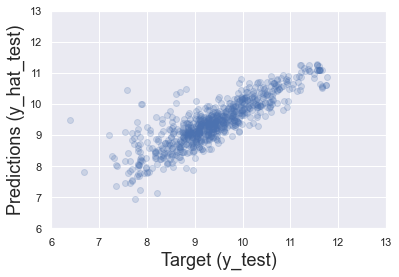

In [97]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Target (y_test)', size =18)
plt.ylabel('Predictions (y_hat_test)', size =18)

plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [105]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Preditction'])
df_pf.head()

,Preditction
0,8270.044621
1,19812.912809
2,5356.302504
3,12469.963529
4,5743.341921


In [106]:
df_pf['Target'] = np.exp(y_test.reset_index(drop=True))
df_pf

,Preditction,Target
0,8270.044621,7650.0
1,19812.912809,12500.0
2,5356.302504,5000.0
3,12469.963529,8999.0
4,5743.341921,6500.0
...,...,...
780,11865.232645,7750.0
781,5484.408240,7500.0
782,11272.983089,13200.0
783,9055.168578,10900.0


In [109]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Preditction']

In [111]:
df_pf['difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'] *100)

In [112]:
df_pf

,Preditction,Target,Residual,difference%
0,8270.044621,7650.0,-620.044621,8.105158
1,19812.912809,12500.0,-7312.912809,58.503302
2,5356.302504,5000.0,-356.302504,7.126050
3,12469.963529,8999.0,-3470.963529,38.570547
4,5743.341921,6500.0,756.658079,11.640894
...,...,...,...,...
780,11865.232645,7750.0,-4115.232645,53.099776
781,5484.408240,7500.0,2015.591760,26.874557
782,11272.983089,13200.0,1927.016911,14.598613
783,9055.168578,10900.0,1844.831422,16.925059


In [113]:
df_pf.describe()

,Preditction,Target,Residual,difference%
count,785.000000,785.000000,785.000000,785.000000
mean,16076.795548,18435.820803,2359.025255,43.035264
std,13882.559983,21457.586797,11598.917265,111.733948
min,1028.206389,600.000000,-32294.496262,0.040494
25%,7567.547916,6999.000000,-2093.056650,11.964977
50%,11602.989122,11000.000000,210.011228,23.617888
75%,19543.544577,20500.000000,3502.824040,39.579679
max,79129.026158,129222.000000,85339.272411,2046.695124


In [122]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values('difference%')

,Preditction,Target,Residual,difference%
132,7596.92,7600.00,3.08,0.04
589,12416.84,12400.00,-16.84,0.14
317,1552.62,1550.00,-2.62,0.17
194,22653.31,22711.65,58.34,0.26
582,18252.64,18300.00,47.36,0.26
100,42614.43,42500.00,-114.43,0.27
553,4186.16,4200.00,13.84,0.33
270,42648.80,42500.00,-148.80,0.35
543,13546.63,13600.00,53.37,0.39
653,11487.78,11403.99,-83.79,0.73
